# 1.) Retail Sales and Profit Analysis Using Python: A Case Study on Superstore Data

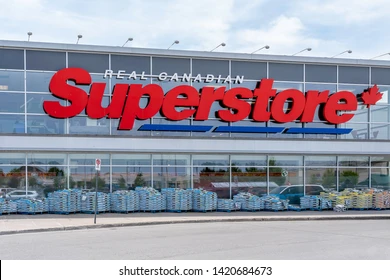

In [18]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')


In [11]:
# Loading the Dataset
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='ISO-8859-1')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [12]:
# Basic Exploration
print(df.shape)
print(df.info())
print(df.describe())

(9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 1

In [14]:
# Check for missing and null values,Duplicates
print(f"Missing Values:{df.isnull().sum()}")
print(f"Duplicate Values:{df.duplicated().sum()}")


Missing Values:Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Duplicate Values:0


In [16]:
# Converting Date Columns into Date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print(df.head(5))
print(df.info())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

# 2.) Sales Over Time (Plotting with Interpretation)


/tmp/ipython-input-21-1770891115.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date')['Sales'].resample('M').sum().plot(figsize=(12,6))


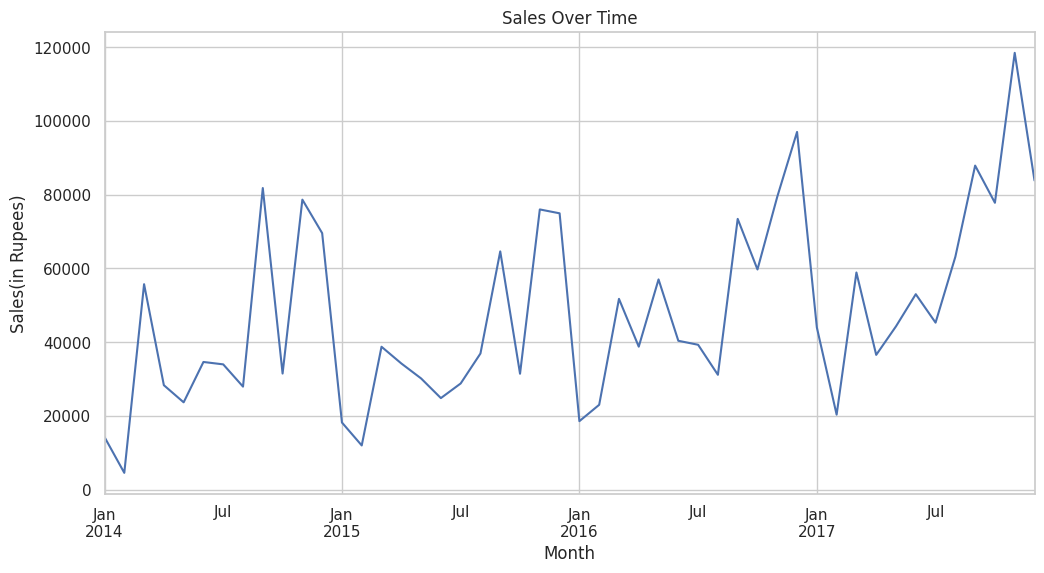

In [21]:
# Exploratory Data Analysis(EDA)
# Sales Over Time
df.set_index('Order Date')['Sales'].resample('M').sum().plot(figsize=(12,6))
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales(in Rupees)')
plt.show()


✅ X-axis (Horizontal):
Represents Time → Monthly intervals from Jan 2014 to Dec 2017

This comes from your resampled 'Order Date' column (monthly using .resample('M'))

✅ Y-axis (Vertical):
Represents Total Sales per month (in Ruppes)

This is the result of .sum() applied on the 'Sales' column after resampling

✅ Trend Observed:
There's high volatility in sales (lots of ups and downs each year)

Sales spikes are visible in some months — possibly due to promotions, year-end buying, or seasonal trends

Overall, there's a rising trend from 2016 onward, especially noticeable in 2017

 The peak appears around late 2017, possibly due to festive season or marketing campaigns

# 3.) Profit vs sales by Category(Plotting with Interpretation)

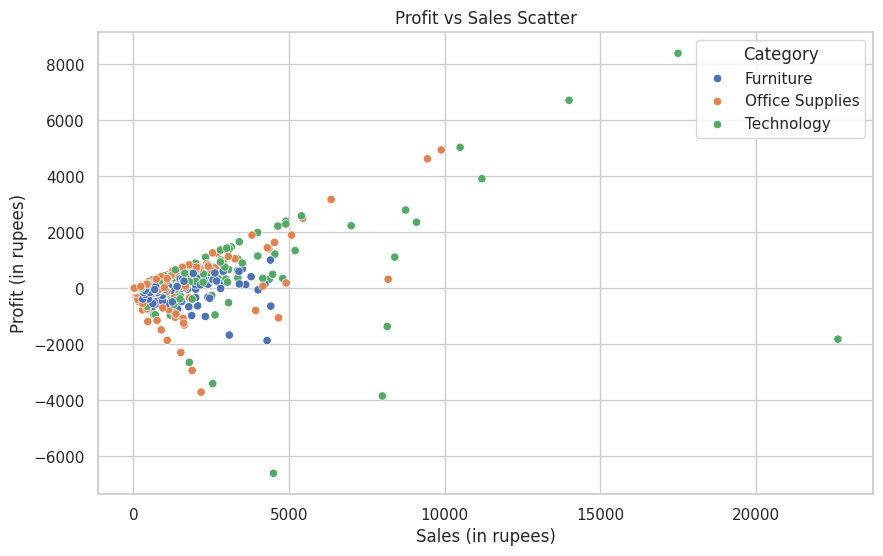

In [26]:
# Profit vs Sales scatter(And renaming the column)
df.rename(columns={'Sales':'Sales (in rupees)','Profit':'Profit (in rupees)'},inplace = True)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales (in rupees)', y='Profit (in rupees)', hue='Category')
plt.title('Profit vs Sales Scatter')
plt.show()

1.✅ General Correlation: More Sales ≠ More Profit
While you’d expect more sales to lead to more profit, this chart shows it’s not always true.

Some high-sales points have negative profit, especially in the Technology category (green).

2.✅ Profit Outliers:
A few Technology products show very high profit, indicating high-margin items.

A few Technology and Office Supplies points have negative profit despite high sales — possibly due to heavy discounts or returns.

3.✅ Furniture (Blue Dots):
Densely clustered around the lower sales and profit range.

Very few high-profit/high-sales points.

Several points in the negative profit zone, suggesting poor profitability for some furniture items.

4.✅ Office Supplies (Orange Dots):
Fairly consistent, with most points near low to mid-range sales and small profits.

However, some losses are visible — might be due to discounts on bulk items.

5.✅ Technology (Green Dots):
Wide spread — from high profit to deep losses.

Some of the highest profit items fall in this category, making it potentially the most volatile but lucrative.✅

# 4.) Region by Sales(Plotting with Interpretation)

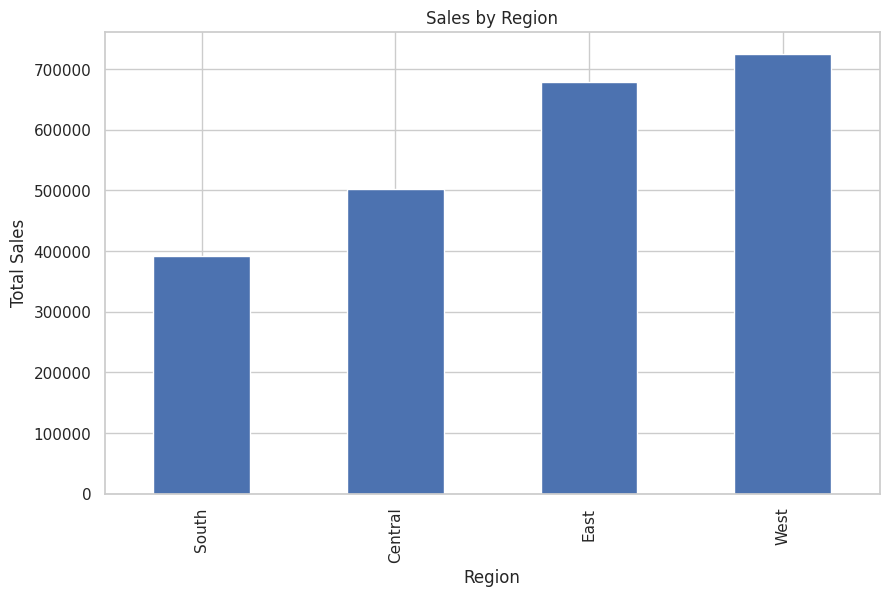

In [29]:
# Reigon by Sales
plt.figure(figsize=(10,6))
region_sales = df.groupby('Region')['Sales (in rupees)'].sum().sort_values()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


✅West Region Dominates: With the highest sales, the West region is likely a key revenue contributor. Consider focusing marketing and inventory efforts here.

✅East Region is Strong: Slightly behind West, it could potentially overtake with the right promotional strategies.

✅South is Underperforming: It might need further investigation — are there fewer customers? Less demand? Poor product mix?

✅Opportunities in Central: Sales are moderate — worth exploring potential for growth through marketing or product expansion.

# 5.) Top 10 Sales and Profits (Plotting,Interpretation)


/tmp/ipython-input-36-3595780780.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_sales_df,x = 'Sales',y = 'Sub-Category',palette = 'Blues_d')


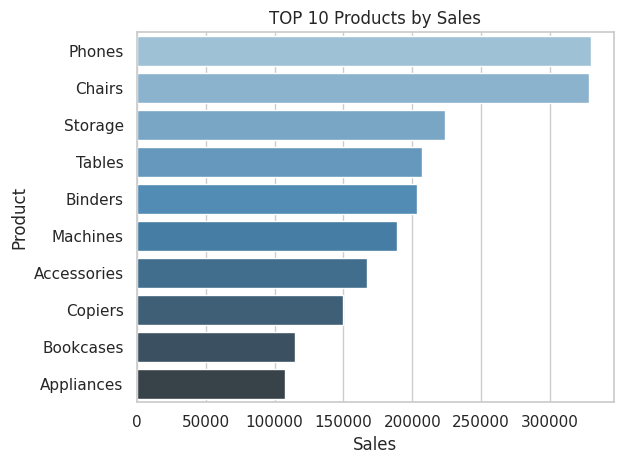

/tmp/ipython-input-36-3595780780.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_df,x = 'Profit',y = 'Sub-Category',palette = 'Greens_d' )


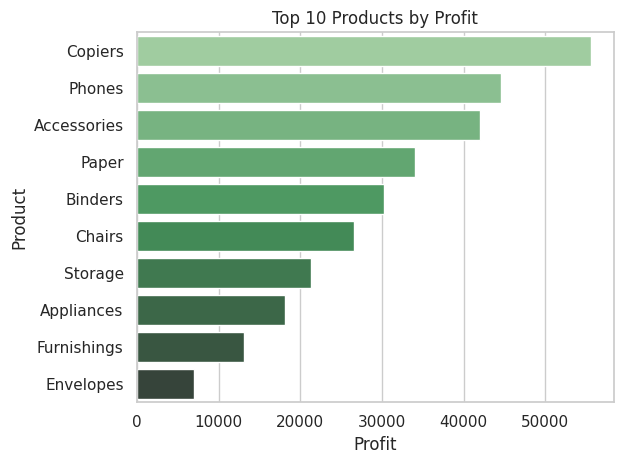

In [36]:
# TOP 10 by Sales and TOP10 by Profit
top_sales = df.groupby('Sub-Category')['Sales (in rupees)'].sum().nlargest(10)
top_profit = df.groupby('Sub-Category')['Profit (in rupees)'].sum().nlargest(10)

# Convert the Series to a DataFrame
top_sales_df = top_sales.reset_index()
top_sales_df.columns = ['Sub-Category', 'Sales']


sns.barplot(data = top_sales_df,x = 'Sales',y = 'Sub-Category',palette = 'Blues_d')
plt.title('TOP 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


# plotting top 10 by profit
top_profit_df = top_profit.reset_index()
top_profit_df.columns = ['Sub-Category','Profit']

sns.barplot(data=top_profit_df,x = 'Profit',y = 'Sub-Category',palette = 'Greens_d' )
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

 ✅ Chart 1: Top 10 Products by Sales
From highest to lowest, the products are:

Phones

Chairs

Storage

Tables

Binders

Machines

Accessories

Copiers

Bookcases

Appliances

🧠 Interpretation:

Phones and Chairs are the top-selling products, indicating high demand.

Storage, Tables, and Binders are also consistent contributors.

Copiers and Appliances have moderate sales (not top 5).

✅ Chart 2: Top 10 Products by Profit
From highest to lowest, the products are:

Copiers

Phones

Accessories

Paper

Binders

Chairs

Storage

Appliances

Furnishings

Envelopes

🧠 Interpretation:

Copiers top the profit chart, even though they’re only 8th in sales → high profit margin.

Phones are 2nd in profit and 1st in sales → superstar product.

Accessories and Paper are high-profit items that didn’t appear in the top sales list.

Binders, Chairs, Storage, and Appliances appear in both lists — good balanced performers.

# 6.) Correlation (Plotting with Interpretation)

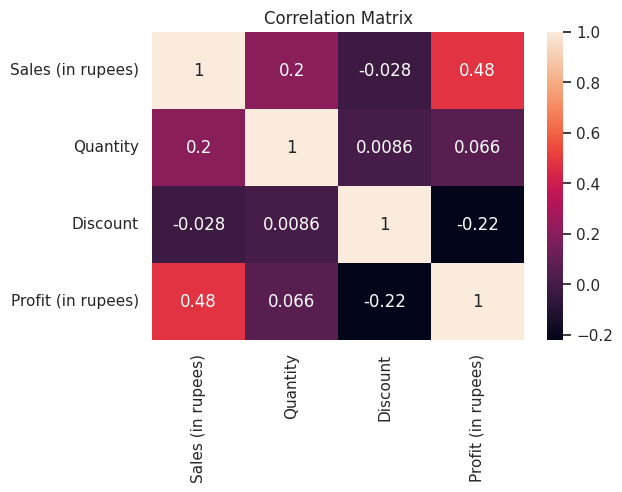

In [40]:
# Correlation Heatmap
plt.figure(figsize = (6,4))
sns.heatmap(df[['Sales (in rupees)','Quantity','Discount','Profit (in rupees)']].corr(),annot = True)
plt.title('Correlation Matrix')
plt.show()

📊 Interpretation: Correlation Matrix (Heatmap)
This heatmap shows how strongly numerical variables like Sales, Profit, Discount, and Quantity are related to each other. Correlation values range from:

+1.0 = perfect positive correlation

–1.0 = perfect negative correlation

0 = no correlation

Sales and Profit are positively related:

💰 More sales generally result in more profit, but it's not a perfect match.

Why? High sales with high discounts or low margins can still lead to low profit.

Discounts reduce profit:

🔻 As discounts increase, profits tend to fall — a moderate negative relationship.

This makes sense: higher discounts eat into profit margins.

Discount does not significantly increase sales or quantity:

❌ Weak or no correlation with both — discounts may not be as effective in boosting volume or sales as expected.

This could indicate ineffective discounting strategies.




# 7.) Final Business Insights


1. Sales and Profit are Moderately Positively Correlated (r = 0.48)
Meaning: Higher sales generally lead to higher profits — but not always.

Implication: Sales growth is important, but it's not a guarantee of profitability. Some products may be sold at low or negative margins.

2. Discount and Profit are Moderately Negatively Correlated (r = -0.22)
Meaning: More discounting tends to reduce profit.

Implication: Giving discounts may attract customers, but it eats into your margins. You should reassess which discounts are effective and which are hurting your bottom line.                

 3. Sales and Quantity are Weakly Positively Correlated (r = 0.20)
Meaning: Selling more items leads to slightly higher sales.

Implication: Quantity does matter, but not strongly — likely because some high-priced items sell in low volume but contribute heavily to revenue.

4. Discount has Almost No Correlation with Sales (r = -0.028)
Meaning: Increasing discount does not significantly boost sales.

Implication: This is critical — your discount strategy may not be working. Discounts may not be the reason people buy more, and they are reducing profits.

